In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [3]:
df.dtypes

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object

Сразу переведем столбец "Дата" в правильный формат

In [4]:
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')

Сгруппируйте данные по дате, посчитайте количество продаж

In [22]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index(name='Сумма продаж')

Вывести несколько первых строк сгруппированных данных

In [23]:
grouped_df.head()

,Дата,Сумма продаж
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055


Нарисуйте график продаж у `grouped_df`

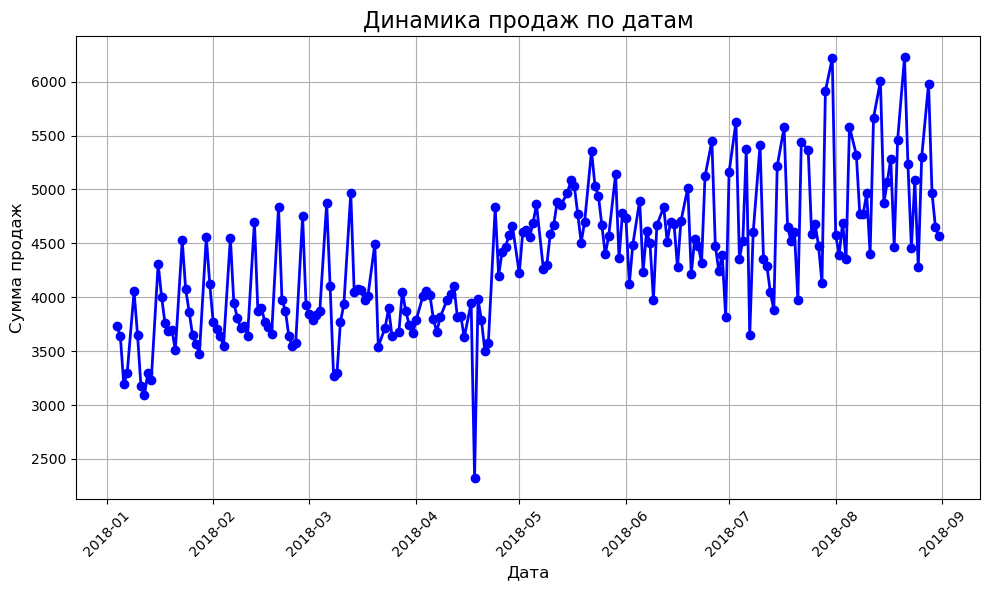

In [24]:
plt.figure(figsize=(10, 6)) 
plt.plot(grouped_df['Дата'], grouped_df['Сумма продаж'], marker='o', color='b', linestyle='-', linewidth=2, markersize=6)

plt.title('Динамика продаж по датам', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Сумма продаж', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

Видно, что в начале периода сумма продаж колеблется в диапазоне от 3500 до 4500, затем в апреле происходит резкое падение до уровня около 2500. После этого наблюдается постепенный рост с колебаниями, достигая максимальных значений около 6000 в августе и сентябре.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [25]:
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]

max_outlier = outliers.loc[outliers['Количество'].idxmax()]

max_outlier

Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object

Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [26]:
df['Месяц'] = df['Дата'].dt.month
df['День недели'] = df['Дата'].dt.weekday

# Оставим только данные для месяцев: июнь (6), июль (7), август (8) и для среды (weekday == 2)
filtered_df = df[(df['Месяц'].isin([6, 7, 8])) & (df['День недели'] == 2)]

# Фильтруем только для склада номер 3
filtered_df = filtered_df[filtered_df['Склад'] == 3]

top_product = filtered_df.groupby('Номенклатура')['Количество'].sum().reset_index()

top_product = top_product.loc[top_product['Количество'].idxmax()]

top_product

Номенклатура    product_1
Количество           2267
Name: 1, dtype: object

Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

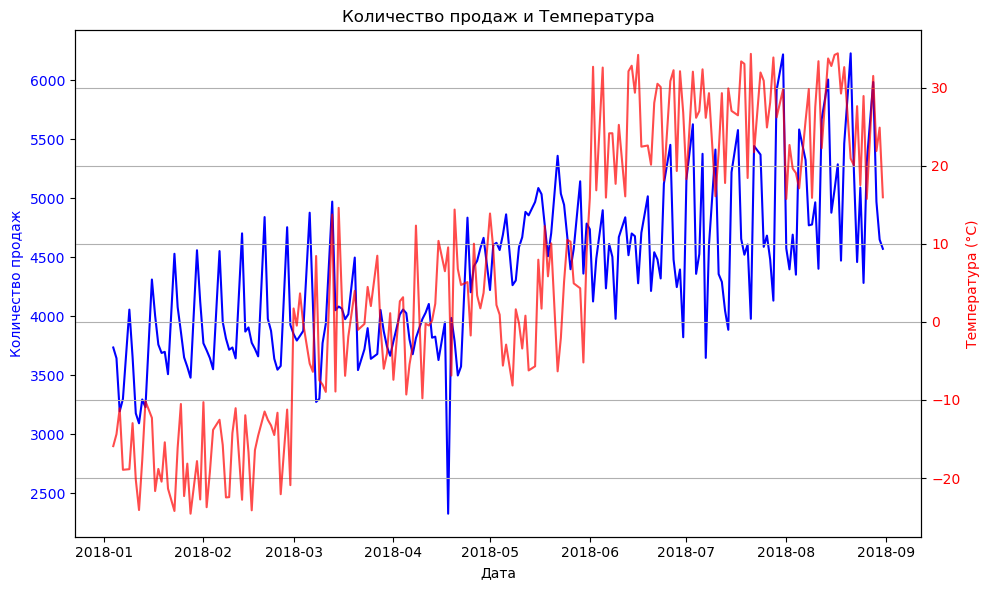

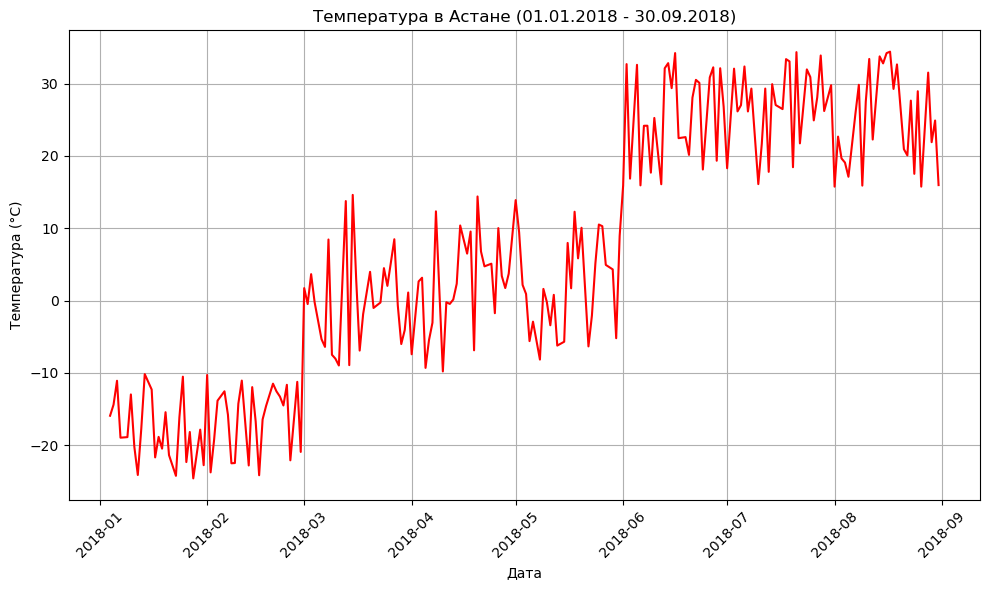

In [28]:
weather_df = pd.read_csv('weather.csv')

weather_df['Дата'] = pd.to_datetime(weather_df['Дата'])

merged_df = pd.merge(grouped_df, weather_df, on='Дата')

fig, ax1 = plt.subplots(figsize=(10, 6))

# График для продаж
ax1.plot(merged_df['Дата'], merged_df['Сумма продаж'], label='Количество продаж', color='b')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Создаем второй график для температуры
ax2 = ax1.twinx()
ax2.plot(merged_df['Дата'], merged_df['Температура'], label='Температура (°C)', color='r', alpha=0.7)
ax2.set_ylabel('Температура (°C)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Количество продаж и Температура')
plt.xticks(rotation=45)
fig.tight_layout()
plt.grid(True)
plt.show()

# График температуры
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Дата'], merged_df['Температура'], label='Температура (°C)', color='r')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.title('Температура в Астане (01.01.2018 - 30.09.2018)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()